In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor



import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
'''
from google.colab import drive
drive.mount('/content/drive/')

data =pd.read_csv('/content/drive/Shareddrives/Data Policy Basketball Project/Capstone/Data Analysis/zain_testing.csv',encoding="ISO-8859-1")
data.head(2)
'''

data = pd.read_csv("D:\\Github\\Capstone-project\\Data folder\\zain_testing.csv")
data.head(2)

,Unnamed: 0_x_x,games_x,games_started_x,mp_per_g_x,fg_per_g_x,fga_per_g_x,fg2_per_g_x,fg2a_per_g_x,fg3_per_g_x,fg3a_per_g_x,...,TORate_y,Blk%_y,Stl%_y,FC/40_y,FD/40_y,FTRate_y,Pct.2_y,%Pct_y,%Pct.1_y,offense
0,8.0,30,29,37.4,8.8,21.9,4.4,10.3,4.4,11.6,...,19.4,0.3,2.7,2.7,5.6,27.4,0.324,0.901,0.437,8860.0
1,9.0,30,30,36.7,7.9,20.8,4.5,10.4,3.4,10.4,...,15.6,0.0,2.2,1.7,4.7,22.9,0.372,0.917,0.482,10563.8


In [5]:
X = data[data.columns[1:100]]
X.head(2)

,games_x,games_started_x,mp_per_g_x,fg_per_g_x,fga_per_g_x,fg2_per_g_x,fg2a_per_g_x,fg3_per_g_x,fg3a_per_g_x,ft_per_g_x,...,obpm_x,dbpm_x,bpm_x,Ht_x,Wt_x,G_x,S_x,%Min_x,ORtg_x,%Poss_x
0,30,29,37.4,8.8,21.9,4.4,10.3,4.4,11.6,4.2,...,5.8,-3.6,2.2,73,170.0,30,30.0,90.4,107.7,34.8
1,30,30,36.7,7.9,20.8,4.5,10.4,3.4,10.4,5.1,...,3.4,-2.4,1.1,73,160.0,30,30.0,88.6,100.0,36.1


In [6]:
y = data['offense']
y.head(2)

0     8860.0
1    10563.8
Name: offense, dtype: float64

In [8]:
#diabetes = datasets.load_diabetes()
#X, y = diabetes.data, diabetes.target

In [9]:
X.columns

Index(['games_x', 'games_started_x', 'mp_per_g_x', 'fg_per_g_x', 'fga_per_g_x',
       'fg2_per_g_x', 'fg2a_per_g_x', 'fg3_per_g_x', 'fg3a_per_g_x',
       'ft_per_g_x', 'fta_per_g_x', 'orb_per_g_x', 'drb_per_g_x',
       'trb_per_g_x', 'ast_per_g_x', 'stl_per_g_x', 'blk_per_g_x',
       'tov_per_g_x', 'pf_per_g_x', 'pts_per_g_x', 'sos_x', 'mp_x', 'fg_x',
       'fga_x', 'fg2_x', 'fg2a_x', 'fg3_x', 'fg3a_x', 'ft_x', 'fta_x', 'orb_x',
       'drb_x', 'trb_x', 'ast_x', 'stl_x', 'blk_x', 'tov_x', 'pf_x', 'pts_x',
       'fg_per_min_x', 'fga_per_min_x', 'fg2_per_min_x', 'fg2a_per_min_x',
       'fg3_per_min_x', 'fg3a_per_min_x', 'ft_per_min_x', 'fta_per_min_x',
       'trb_per_min_x', 'ast_per_min_x', 'stl_per_min_x', 'blk_per_min_x',
       'tov_per_min_x', 'pf_per_min_x', 'pts_per_min_x', 'fg_per_poss_x',
       'fga_per_poss_x', 'fg2_per_poss_x', 'fg2a_per_poss_x', 'fg3_per_poss_x',
       'fg3a_per_poss_x', 'ft_per_poss_x', 'fta_per_poss_x', 'trb_per_poss_x',
       'ast_per_poss_x', '

In [10]:
print(X.shape)
print(y.shape)

(6106, 99)
(6106,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 5,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [12]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 3692190.2225


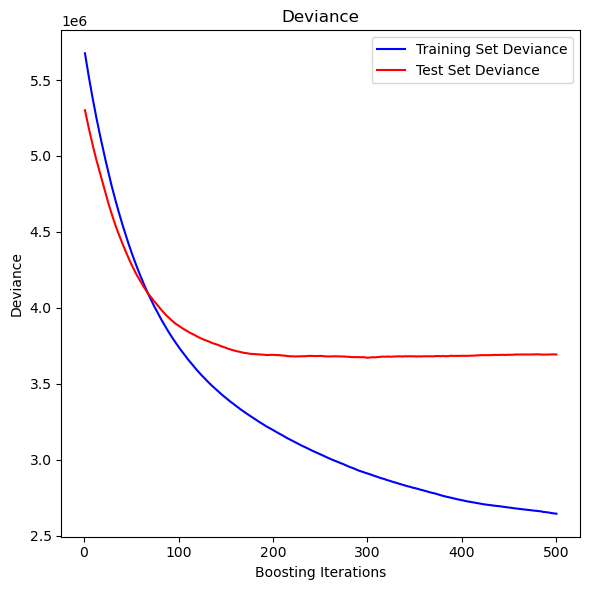

In [13]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

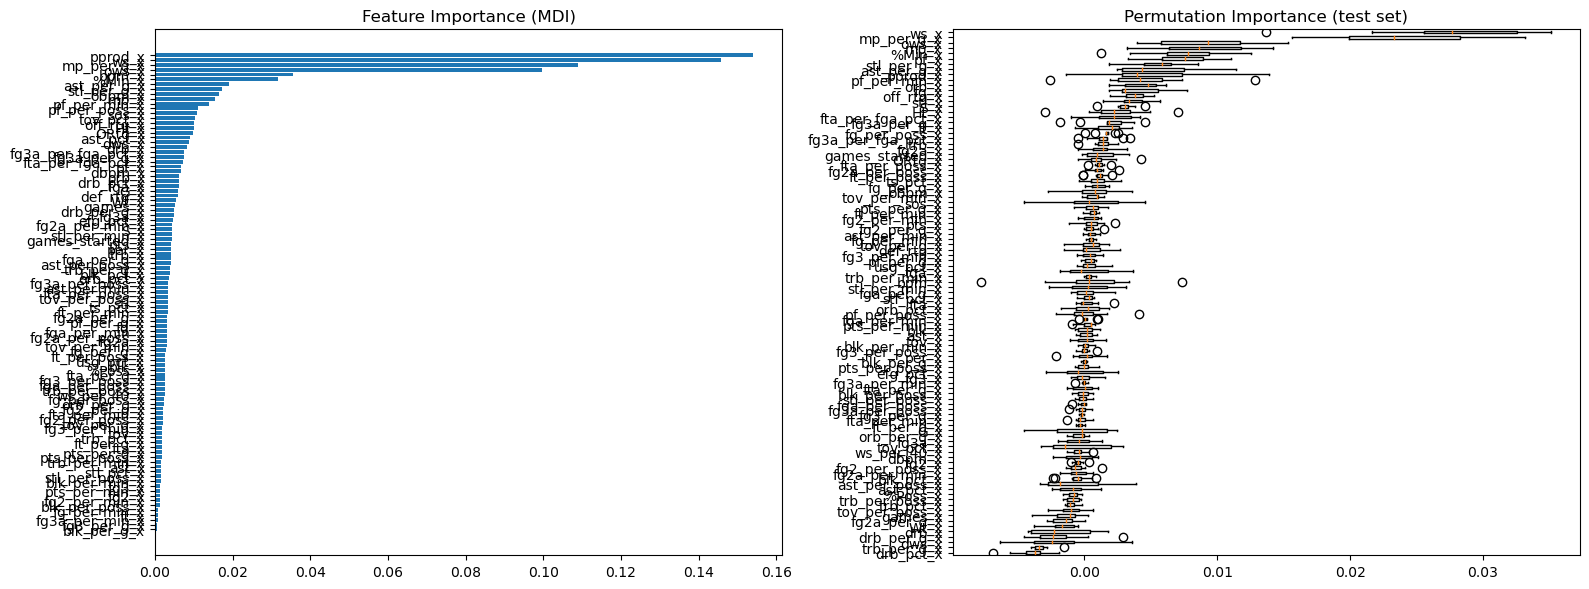

In [14]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()